<a target="_blank" href="https://colab.research.google.com/github/yajuna/crafting_math/blob/master/GenerateSongsFromLearningLyrics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook is modified from the Google colab notebook for NLP. You can find a playlist of videos on NLP here: 
https://www.youtube.com/playlist?list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S

The original notebook is linked under the Part 6 video (Training an AI to create poetry).


In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

Download and install required packages for data

In [2]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import library and download data from Kaggle. Here we use the 21 pilots songs for lyrics prediction NLP at 

https://www.kaggle.com/datasets/cosmosankur/21-pilots-songs-for-lyrics-prediction-nlp

For datasets on Kaggle, you will need a token from Kaggle, via My Profile--> Account--> API-->Create New Token

In [3]:
import opendatasets as od
import pandas 
print(pandas.__version__)

1.5.3


Take .csv file in a github repository (url when file viewed as RAW). 

Save column containing lyrics as one text file.

In [4]:
### Use data in .csv files in github repo

url = 'https://raw.githubusercontent.com/yajuna/crafting_math/master/radiohead.csv'
df = pandas.read_csv(url, encoding = 'cp1252') # 

print(df["lyrics"][0])

df["lyrics"].to_csv('lyrics.txt', sep = "\n", index = False, header = False)



### Irish song lyrics
# !wget --no-check-certificate \
#     https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
#     -O /tmp/irish-lyrics-eof.txt



you are the sun and moon and stars are you and i could never run away from you you try at working out chaotic things and why should i believe myself not you it's like the world is going to end so soon and why should i believe myself aaaaaaaaah ha hooooooo you me and everything caught in the fire i can see me drowning caught in the fire you me and everything caught in the fire i can see me drowning caught in the fire


In [5]:
tokenizer = Tokenizer()

# read irish lyrics for song prediction
# data = open('/tmp/irish-lyrics-eof.txt').read()

data = open('/content/lyrics.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'you': 2, 'i': 3, 'and': 4, 'no': 5, 'a': 6, 'me': 7, 'to': 8, 'in': 9, 'your': 10, 'it': 11, 'all': 12, 'my': 13, 'up': 14, "don't": 15, 'of': 16, 'on': 17, "i'm": 18, 'is': 19, 'we': 20, 'out': 21, 'are': 22, 'be': 23, 'can': 24, 'that': 25, 'will': 26, 'not': 27, 'but': 28, 'down': 29, "it's": 30, 'get': 31, 'this': 32, 'what': 33, 'rain': 34, 'just': 35, 'off': 36, 'like': 37, 'do': 38, 'with': 39, 'when': 40, 'there': 41, 'know': 42, 'they': 43, 'got': 44, 'drops': 45, 'want': 46, 'so': 47, 'here': 48, "you're": 49, 'for': 50, 'one': 51, 'where': 52, 'into': 53, 'back': 54, "you've": 55, 'at': 56, 'around': 57, 'let': 58, "can't": 59, 'from': 60, 'if': 61, 'everything': 62, 'nothing': 63, 'come': 64, 'now': 65, 'yourself': 66, 'take': 67, 'see': 68, 'feel': 69, 'as': 70, 'should': 71, 'again': 72, "i'll": 73, 'over': 74, 'arms': 75, 'never': 76, 'am': 77, 'love': 78, 'time': 79, 'broken': 80, 'really': 81, 'mess': 82, 'have': 83, 'go': 84, 'think': 85, 'children': 86, '

In [6]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [7]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['one'])

9
1
457
16
51


In [8]:
print(xs[6])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [9]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [10]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
432/432 [==============================] - 69s 131ms/step - loss: 5.5838 - accuracy: 0.1356
Epoch 2/100
432/432 [==============================] - 24s 55ms/step - loss: 4.0476 - accuracy: 0.2956
Epoch 3/100
432/432 [==============================] - 18s 41ms/step - loss: 3.0261 - accuracy: 0.4098
Epoch 4/100
432/432 [==============================] - 17s 40ms/step - loss: 2.4225 - accuracy: 0.4787
Epoch 5/100
432/432 [==============================] - 16s 37ms/step - loss: 1.9708 - accuracy: 0.5451
Epoch 6/100
432/432 [==============================] - 14s 33ms/step - loss: 1.7068 - accuracy: 0.5910
Epoch 7/100
432/432 [==============================] - 14s 32ms/step - loss: 1.5802 - accuracy: 0.6186
Epoch 8/100
432/432 [==============================] - 14s 33ms/step - loss: 1.4117 - accuracy: 0.6492
Epoch 9/100
432/432 [==============================] - 15s 34ms/step - loss: 1.3459 - accuracy: 0.6655
Epoch 10/100
432/432 [==============================] - 14s 32ms/step - 

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

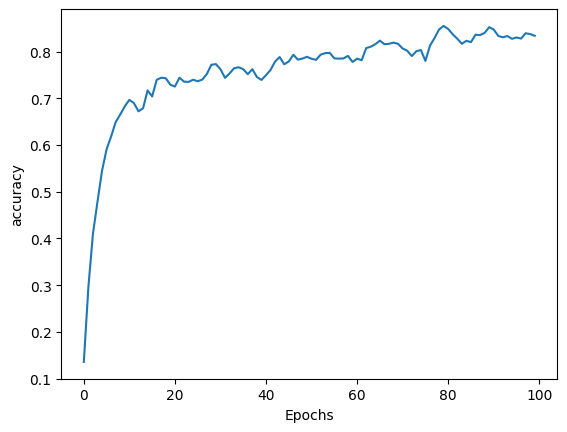

In [13]:
plot_graphs(history, 'accuracy')


In [15]:
seed_text = "Can't stop thinking about if and when I'd die"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 24ms/step
Can't stop thinking about if and when I'd die is duplicate off the rails so don't get any big ideas they're not gonna happen you'll go to hell for what i am glued just happy to see you honey the smell have ourselves nothing we could this is over at a low flying panic attack sing the song on the jukebox that goes burn the witch want a perfect laugh and this just feels like spinning plates i'm living in cloud cuckoo land and this just feels like spinning plates i'm living in cloud cuckoo land and this just feels like spinning plates i'm living in cloud cuckoo land
